In [61]:
import pandas as pd
import numpy as np
# untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

## Get Data Train 

In [62]:
df = pd.read_csv("dataset/kendaraan_train_clean.csv")
df_test = pd.read_csv("dataset/kendaraan_test_clean.csv")

## Check Categorical di kolom tertarik

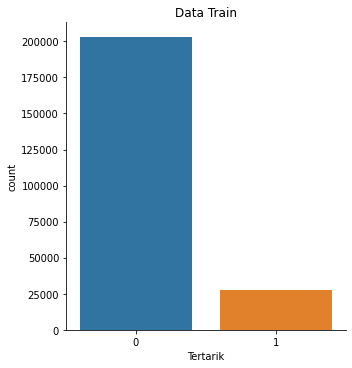

In [63]:
sns.catplot(x='Tertarik', data=df, kind='count').set(title='Data Train')


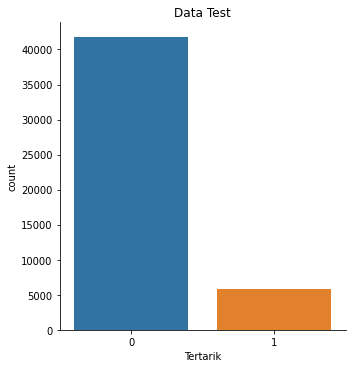

In [64]:
sns.catplot(x='Tertarik', data=df_test, kind='count').set(title='Data Test')

## Feature Selection

Text(0.5, 1.0, 'Korelasi Tiap Atribut')

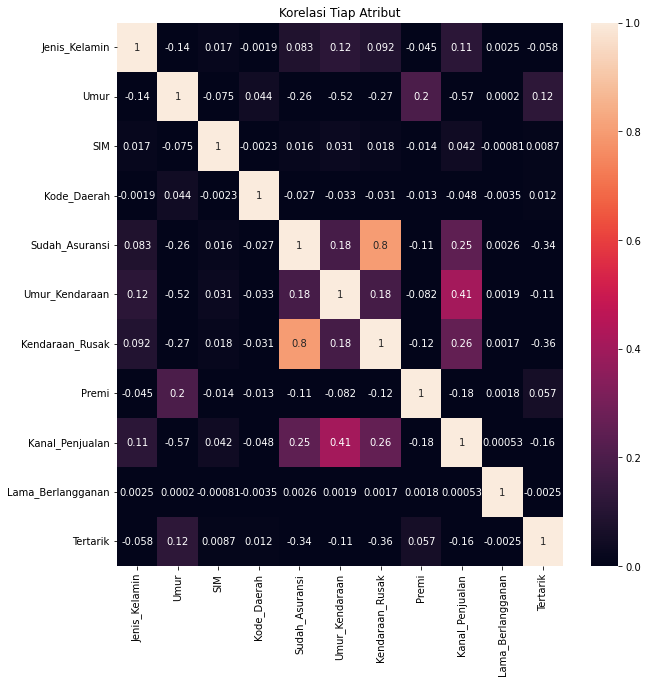

In [65]:
corr = df.corr()
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(corr, vmin=0, vmax=1, annot=True)
heatmap.set_title('Korelasi Tiap Atribut')

In [66]:
#83 - 82
# df = df[["Jenis_Kelamin", "Sudah_Asuransi", "Kanal_Penjualan", "Tertarik"]]
# df_test = df_test[["Jenis_Kelamin", "Sudah_Asuransi", "Kanal_Penjualan", "Tertarik"]]

# 88
# df = df[["SIM","Kode_Daerah","Premi","Kanal_Penjualan","Lama_Berlangganan", "Tertarik"]]
# df_test = df_test[["SIM","Kode_Daerah","Premi","Kanal_Penjualan","Lama_Berlangganan", "Tertarik"]]

#82 - 87
# df = df[["Jenis_Kelamin", "Sudah_Asuransi", "Premi", "Kanal_Penjualan", "Tertarik"]]
# df_test = df_test[["Jenis_Kelamin", "Sudah_Asuransi", "Premi", "Kanal_Penjualan", "Tertarik"]]

#81
# df = df[["Jenis_Kelamin", "Kode_Daerah", "Sudah_Asuransi", "Kanal_Penjualan", "Lama_Berlangganan", "Tertarik"]]
# df_test = df_test[["Jenis_Kelamin", "Kode_Daerah", "Sudah_Asuransi", "Kanal_Penjualan", "Lama_Berlangganan", "Tertarik"]]


# df = df[["Jenis_Kelamin", "SIM", "Kode_Daerah", "Premi", "Lama_Berlangganan", "Tertarik"]]
# df_test = df_test[["Jenis_Kelamin", "SIM", "Kode_Daerah", "Premi", "Lama_Berlangganan", "Tertarik"]]
# df = df[["Umur", "SIM", "Kode_Daerah", "Premi", "Lama_Berlangganan", "Tertarik"]]
# df_test = df_test[["Umur", "SIM", "Kode_Daerah", "Premi", "Lama_Berlangganan", "Tertarik"]]


## Naive Bayes Classifier

### Initiate Pre data

In [67]:
def initiatePredata(features, target):
  categories_target = np.unique(target)    
  mean = features.groupby(target).mean().to_numpy()  
  var = features.groupby(target).var().to_numpy()
    
  return categories_target, mean, var

### Calculate Prior 

In [68]:
def calcPrior(features, target, categories_target):    
  priors = []  
  for i in categories_target:
      # mengambil prior dengan membagi 
      # panjang data feature tiap target dan
      # panjang data feature
      prior = len(features[target==i])/len(df)
      priors.append(prior)
  return priors

### Calculate Gaussian 

In [69]:
def calcGaussianDensity(class_idx, feature, mean, var):
  # mengambil mean tiap kategori target
  mean_categories = mean[class_idx]
  # mengambil variansi tiap kategori target
  var_categories = var[class_idx]
  numerator = np.exp((-1/2)*((feature-mean_categories)**2) / (2 * var_categories))
  denominator = np.sqrt(2 * np.pi * var_categories)
  gauss_val = numerator / denominator
  return gauss_val

### Calculate Posterior

In [70]:
def calcPosterior(feature, prior, categories_target, mean, var):
  posteriors = []
  # menghitung probabilitas posterior untuk tiap targetnya dengan syarat tiap kolom
  # P(y|X) = P(X|y) * P(y)
  for i in range(len(categories_target)):
    # mengambil prior / probabilitas dari tiap kategori target / P(y)      
    prior_cat = np.log(prior[i]) 
    # mengambil conditional / probabilitas feature bersyarat 
    # dari tiap kategori target P(X|y)       
    conditional_cat = np.sum(np.log(calcGaussianDensity(i, feature, mean, var)))
    posterior = prior_cat + conditional_cat
    posteriors.append(posterior)
  return categories_target[np.argmax(posteriors)]

### Main Function

In [71]:
def naiveBayes(features, target, test_features):
  categories_target, mean, var = initiatePredata(features, target)  
  prior = calcPrior(features, target, categories_target)  
  predicts = []
  for feat_test in test_features.to_numpy():
    predicts.append(calcPosterior(feat_test, prior, categories_target, mean, var))
  return predicts

In [72]:
def accuracy(y_test, y_pred):
  accuracy = np.sum(y_test == y_pred) / len(y_test)
  return accuracy

## Apart Feature and Target

In [73]:
feature_data = df.drop("Tertarik", axis=1)
target_data = df["Tertarik"]

## Data Splitting

In [74]:
feature_train, feature_test, target_train, target_test = train_test_split(feature_data, target_data, test_size=0.2)

print("Jumlah Data dan Kolom Train Feature: ", feature_train.shape)
print("Jumlah Data dan Kolom Train Target: ", target_train.shape)
print("Jumlah Data dan Kolom Test Feature: ", feature_test.shape)
print("Jumlah Data dan Kolom Test Target: ", target_test.shape)

Jumlah Data dan Kolom Train Feature:  (184552, 10)
Jumlah Data dan Kolom Train Target:  (184552,)
Jumlah Data dan Kolom Test Feature:  (46138, 10)
Jumlah Data dan Kolom Test Target:  (46138,)


## Train Model and Predict with Dataset Train

In [75]:
preds_target = naiveBayes(feature_train, target_train, feature_test)
print("Jumlah data prediksi: ",len(preds_target))

Jumlah data prediksi:  46138


## Evaluasi Model

<AxesSubplot:>

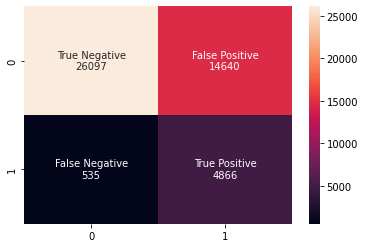

In [76]:
conf_matrix = confusion_matrix(target_test, preds_target)
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in conf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, fmt='')

In [77]:
print(classification_report(target_test, preds_target))
accur = accuracy(target_test, preds_target)
accur

              precision    recall  f1-score   support

           0       0.98      0.64      0.77     40737
           1       0.25      0.90      0.39      5401

    accuracy                           0.67     46138
   macro avg       0.61      0.77      0.58     46138
weighted avg       0.89      0.67      0.73     46138



0.6710954094239022

## Validate and Evaluate with Dataset Test

In [78]:
feature_eval_test = df_test.drop("Tertarik", axis=1)
target_eval_test = df_test["Tertarik"]

47639


<AxesSubplot:>

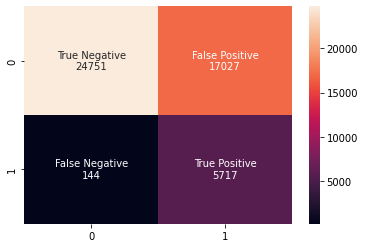

In [79]:
target_eval_pred = naiveBayes(feature_train, target_train, feature_eval_test)

print(len(target_eval_pred))
conf_matrix = confusion_matrix(target_eval_test, target_eval_pred)

group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in conf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, fmt='')

In [80]:
print(classification_report(target_eval_test, target_eval_pred))


              precision    recall  f1-score   support

           0       0.99      0.59      0.74     41778
           1       0.25      0.98      0.40      5861

    accuracy                           0.64     47639
   macro avg       0.62      0.78      0.57     47639
weighted avg       0.90      0.64      0.70     47639

